  **EDA Commerce-e marketplace in *Pakistan***

about the data :

> Geographic Location: Pakistan

> Time Period: March 2016 - August 2018

> Data Source: Commerce-e marketplace in Pakistan

> Data Set: Detailed information on half a million online trade orders in Pakistan,including item details, shipping method, payment methods, product categories,order date, SKU (Product ID), price, quantity, total amount, and customer ID.












In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import statsmodels.api as sm
from scipy import stats

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Pakistan Largest Ecommerce Dataset.csv')
data.head()

<ipython-input-2-3602f242e9ed>:1: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Pakistan Largest Ecommerce Dataset.csv')


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN




**check the size of data**

In [3]:
print(data.shape)

(1048575, 26)


**we found empty columns (Unnamed: 21 - Unnamed: 25) then
we will delete the empty columns**

In [4]:
data = data.dropna(axis=1, how='all')
data.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

**Details about the data :**

In [6]:

print(f"There are {data.shape[0]} instances.")
print(f"There are {data.shape[1]} dataframe columns/attributes.")

num_attribs = data.select_dtypes(include = ['float64', 'int64'])
cat_attribs = [data.columns[i] for i in range(len(data.columns)) if data.columns[i] not in num_attribs]

print(f"\nThere are {len(cat_attribs)} categorical attributes: ")
for i in range(len(cat_attribs)):
    print(f"{i+1}. {cat_attribs[i]}")

There are 1048575 instances.
There are 21 dataframe columns/attributes.

There are 13 categorical attributes: 
1. status
2. created_at
3. sku
4. increment_id
5. category_name_1
6. sales_commission_code
7. payment_method
8. Working Date
9. BI Status
10.  MV 
11. Customer Since
12. M-Y
13. FY


**check how many null values we have**

In [7]:
data.isna().sum()

item_id                  464051
status                   464066
created_at               464051
sku                      464071
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464215
sales_commission_code    601229
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Year                     464051
Month                    464051
Customer Since           464062
M-Y                      464051
FY                       464051
Customer ID              464062
dtype: int64

**take a look to the tail**

In [8]:
data.tail()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**delete null rows**

In [9]:
data.dropna(how='all', inplace = True)

**check if it is done**

In [10]:
data.tail()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584523,905208.0,processing,8/28/2018,MATSAM5B10F91A9B6AB,108640.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"217,280",2018.0,8.0,2018-7,8-2018,FY19,113474.0


**null value**

In [11]:
data.isna().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137178
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

**find how many duplicated values**

In [12]:
data.duplicated().sum()


0

**number of items in the data**

In [13]:
print("we have",data['item_id'].nunique(),"items in the data")


we have 584524 items in the data


**orders status for all items**

In [14]:
statusfilt=data.groupby('status')['item_id'].nunique().sort_values(ascending=False)
statusfilt

status
complete          233685
canceled          201249
received           77290
order_refunded     59529
refund              8050
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
\N                     4
exchange               4
Name: item_id, dtype: int64

**the status for every payment method**

In [15]:
status_payment_pivot = pd.pivot_table(data,
                                      index='status',
                                      columns='payment_method',
                                      values='item_id',
                                      aggfunc=pd.Series.nunique)
status_payment_pivot

payment_method,Easypay,Easypay_MA,Payaxis,apg,bankalfalah,cashatdoorstep,cod,customercredit,easypay_voucher,financesettlement,internetbanking,jazzvoucher,jazzwallet,marketingexpense,mcblite,mygateway,productcredit,ublcreditcard
status,,,,,,,,,,,,,,,,,,
\N,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
canceled,52040.0,9210.0,61267.0,1361.0,16184.0,5.0,21753.0,47.0,12189.0,1.0,286.0,8472.0,16933.0,NaN,179.0,652.0,10.0,660.0
closed,16.0,NaN,71.0,NaN,5.0,NaN,360.0,24.0,2.0,NaN,4.0,2.0,3.0,NaN,1.0,NaN,2.0,4.0
cod,NaN,NaN,NaN,NaN,NaN,NaN,2859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
complete,19214.0,3116.0,22809.0,27.0,586.0,674.0,148039.0,4151.0,16066.0,9.0,156.0,4619.0,13505.0,42.0,393.0,14.0,83.0,182.0
exchange,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fraud,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
holded,2.0,NaN,8.0,NaN,15.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_refunded,2622.0,315.0,3813.0,42.0,746.0,30.0,48771.0,1269.0,480.0,1.0,16.0,412.0,835.0,1.0,137.0,3.0,15.0,21.0


**Number of Customer**

Here we looked at the number of customers in each month of the year

In [74]:
pd.crosstab(index = data['Customer Since'], columns='count',values=data[~(data['Customer ID'].duplicated())]['Customer ID'],aggfunc='count').sort_values(by = 'count')


col_0,count
Customer Since,
2018-8,1530
2017-9,1546
2018-7,1768
2018-6,1933
2018-1,2002
2017-12,2397
2016-7,2406
2017-1,2410
2018-4,2486


**get the numerical data**

In [16]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
0,211131.0,1950.0,1.0,1950.0,0.0,2016.0,7.0,1.0
1,211133.0,240.0,1.0,240.0,0.0,2016.0,7.0,2.0
2,211134.0,2450.0,1.0,2450.0,0.0,2016.0,7.0,3.0
3,211135.0,360.0,1.0,60.0,300.0,2016.0,7.0,4.0
4,211136.0,555.0,2.0,1110.0,0.0,2016.0,7.0,5.0


**plot them all in one graph:**

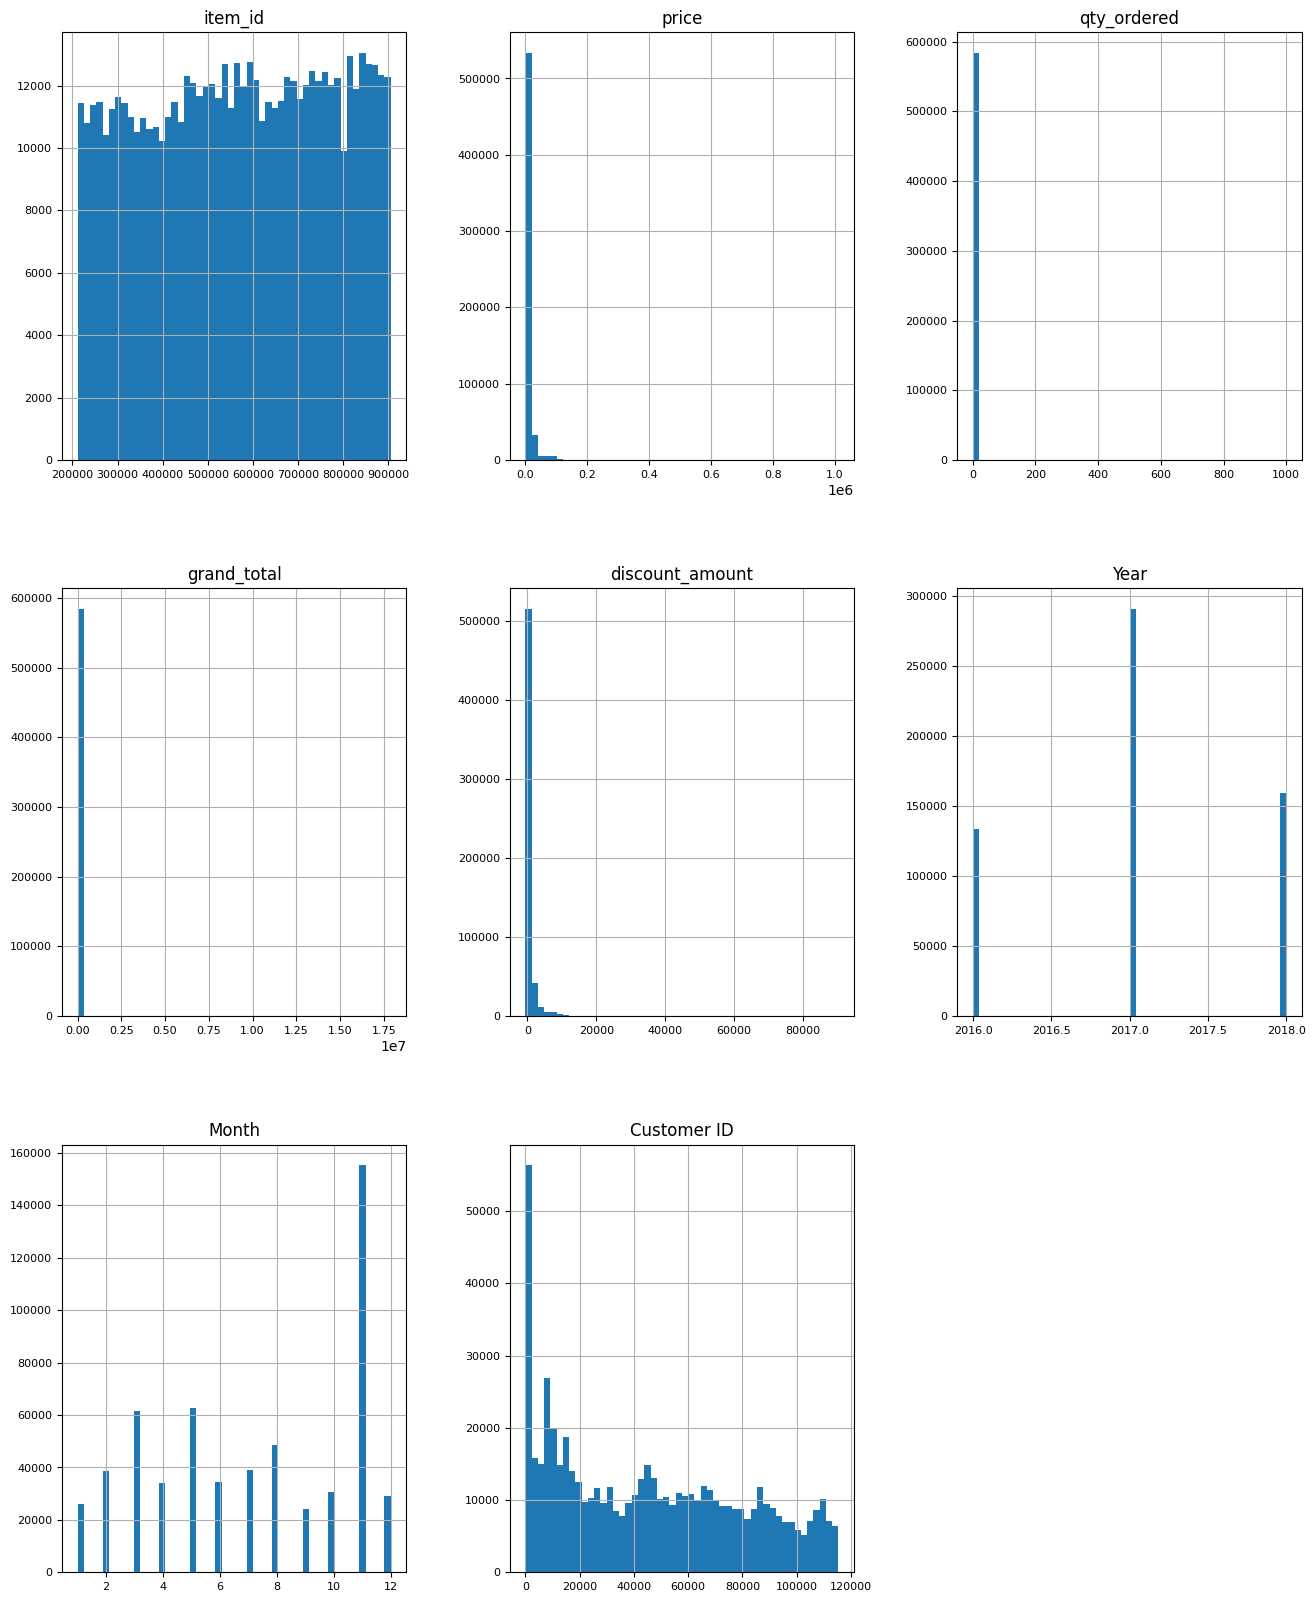

In [17]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

**Heat map for the numerical values**

Python, and its libraries, make lots of things easy. For example, once the correlation matrix is defined , it can be passed to Seaborn’s heatmap() method to create a heatmap (or headgrid). The basic idea of heatmaps is that they replace numbers with colors of varying shades, as indicated by the scale on the right. Cells that are lighter have higher values of r. This type of visualization can make it much easier to spot linear relationships between variables than a table of numbers. For example, if I focus on the “Strength” column, I immediately see that “Cement” and “FlyAsh” have the largest positive correlations whereas “Slag” has the large negative correlation.

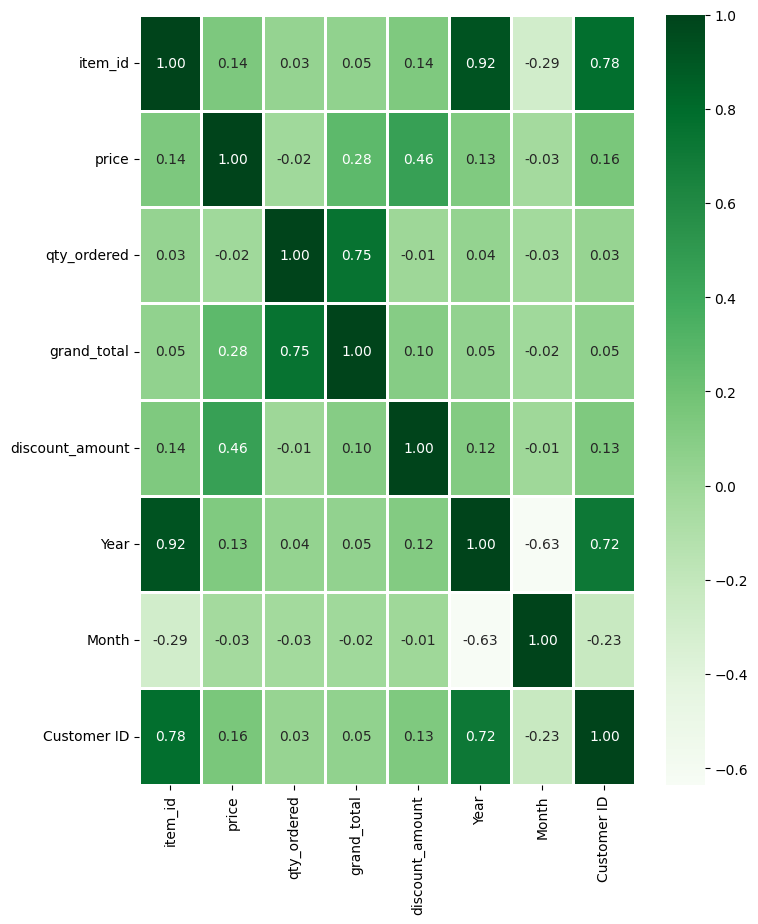

In [36]:
plt.figure(figsize = (8, 10))
sns.heatmap(df_num.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 10}, linewidth = 2, linecolor = 'white', cmap="Greens")
plt.show()

**orders count percent by year**

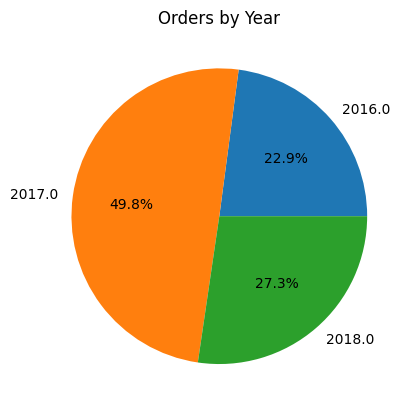

In [18]:
monthly_counts = data.groupby('Year')['item_id'].count()
plt.pie(monthly_counts, labels=monthly_counts.index, autopct='%1.1f%%')
plt.title('Orders by Year')
plt.show()

**Sales in each year by the grand total**

In this drawing we can see all sales over the given three years, as it shows them in detail by month

In [19]:
def data_filter(year, xaxis, yaxis):
    df_year_filter = data[data['Year'] == year]
    df_cat_sales = df_year_filter.groupby(xaxis)[yaxis].sum().reset_index()
    df_cat_sort = df_cat_sales.sort_values([xaxis], ascending=True)
    return df_cat_sort

data_2016 = data_filter(2016, "created_at", "grand_total")
data_2017 = data_filter(2017, "created_at", "grand_total")
data_2018 = data_filter(2018, "created_at", "grand_total")

trace_2016 = go.Scatter(x=data_2016['created_at'], y=data_2016['grand_total'], mode='lines', name='2016')
trace_2017 = go.Scatter(x=data_2017['created_at'], y=data_2017['grand_total'], mode='lines', name='2017')
trace_2018 = go.Scatter(x=data_2018['created_at'], y=data_2018['grand_total'], mode='lines', name='2018')

layout = go.Layout(title='Sales by Year',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Total Sales'),
                   )
fig = go.Figure(data=[trace_2016, trace_2017, trace_2018], layout=layout)
fig.show()

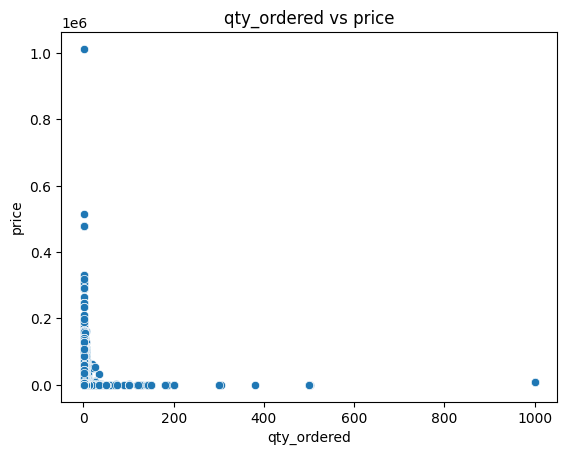

In [62]:
ax = sns.scatterplot(x="qty_ordered", y="price", data=data)
ax.set_title("qty_ordered vs price")
ax.set_xlabel("qty_ordered");

**find the Top selling category in all years**

In [20]:
tops = data.groupby('category_name_1')
topsprice= tops['price'].agg(np.sum)
topsqty= tops['qty_ordered'].agg(np.sum)

print("Top selling category\n", topsqty)

Top selling category
 category_name_1
Appliances             58203.0
Beauty & Grooming      53790.0
Books                   2641.0
Computing              17251.0
Entertainment          27419.0
Health & Sports        21420.0
Home & Living          30065.0
Kids & Baby            18565.0
Men's Fashion         101424.0
Mobiles & Tablets     132695.0
Others                 84916.0
School & Education      4136.0
Soghaat                47418.0
Superstore             82542.0
Women's Fashion        64216.0
\N                      9647.0
Name: qty_ordered, dtype: float64


In [58]:
cat_total = data.groupby(['category_name_1'])['grand_total'].sum().sort_values(ascending=False)
fig = px.bar(cat_total, x=cat_total.index, y=cat_total.values, text='grand_total')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside', marker_color='green')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(yaxis_title='Total payments')
fig.show()

we notes that we have 18 unique value of payment method

In [50]:
data['payment_method'] = data['payment_method'].astype('category')
data.describe(include='category')

,payment_method,Month
count,584524,584524.0
unique,18,12.0
top,cod,11.0
freq,271960,155456.0


In [76]:
data['payment_method'].unique()

['cod', 'ublcreditcard', 'mygateway', 'customercredit', 'cashatdoorstep', ..., 'Easypay', 'Easypay_MA', 'easypay_voucher', 'bankalfalah', 'apg']
Length: 18
Categories (18, object): ['Easypay', 'Easypay_MA', 'Payaxis', 'apg', ..., 'mcblite', 'mygateway',
                          'productcredit', 'ublcreditcard']

**Top payment method in all years by total price**

In [22]:
pay_met = data.groupby(['payment_method'])['grand_total'].sum().sort_values(ascending=False)
fig = px.bar(pay_met, x=pay_met.index, y=pay_met.values, text='grand_total')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(yaxis_title='Total payments')
fig.show()

**order status in all years**

In [23]:
pay_met = data.groupby(['status'])['grand_total'].sum().sort_values(ascending=False)
fig = px.bar(pay_met, x=pay_met.index, y=pay_met.values, text='grand_total')
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(yaxis_title='Total orders')
fig.show()

**Number of orders for every Category**

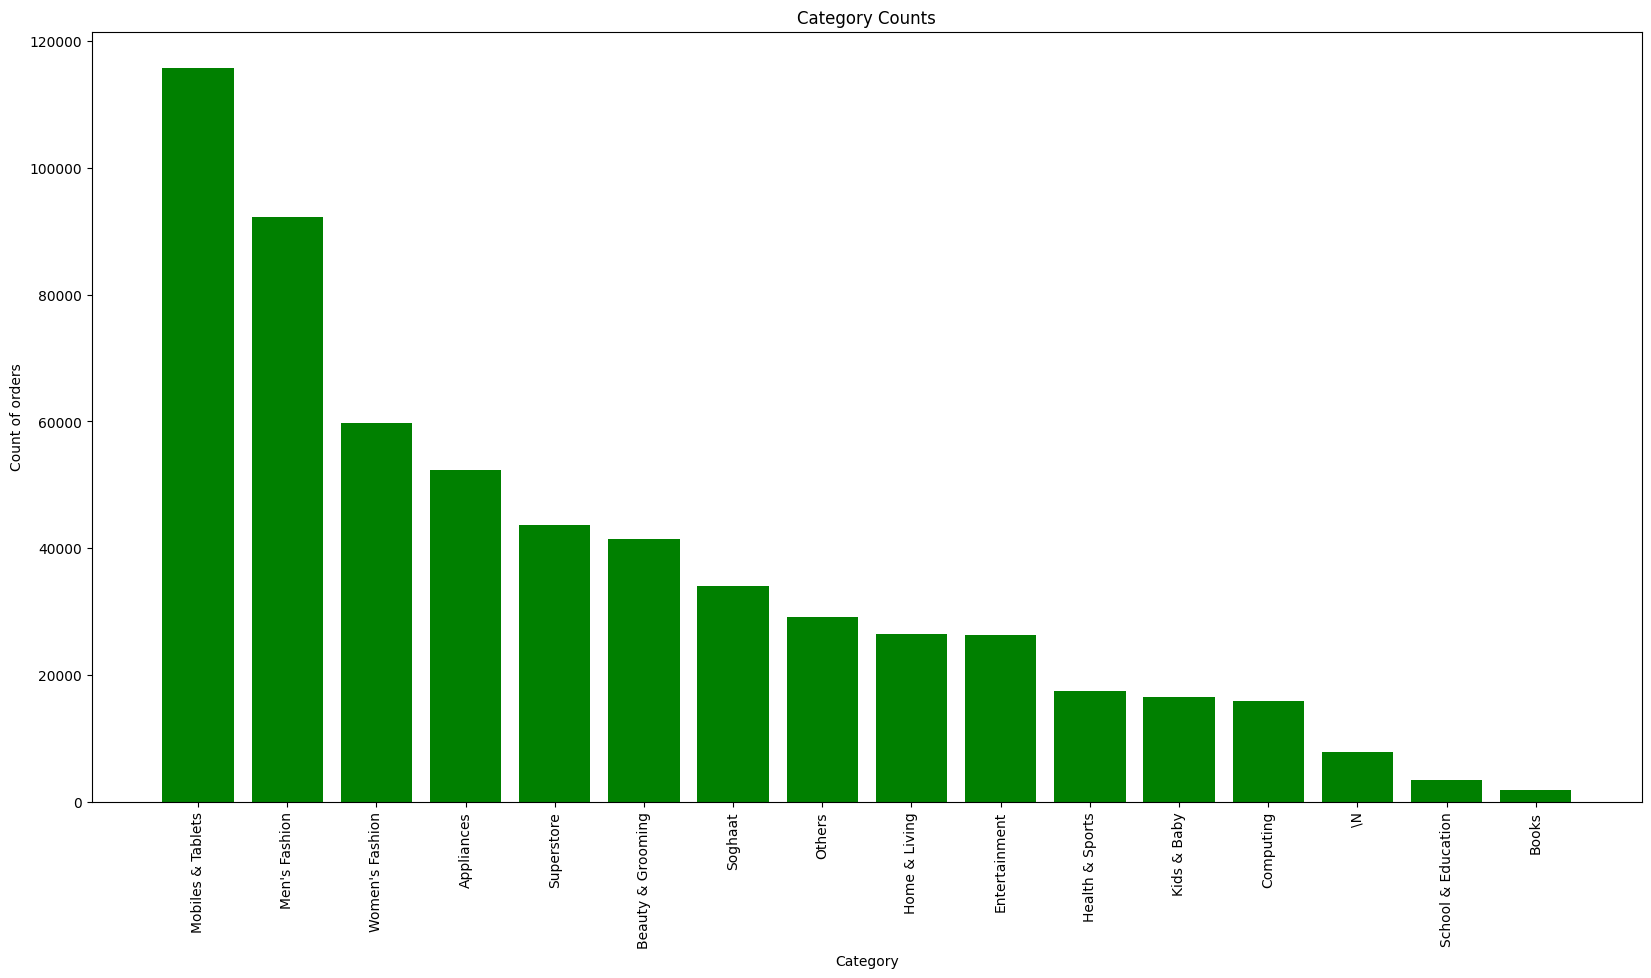

In [24]:
cat_counts = data['category_name_1'].value_counts()
plt.figure(figsize=(20,10))
plt.bar(cat_counts.index, cat_counts, color='green')
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count of orders')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], rotation=90)
plt.show()

**top10 products ordered products in all years**

In [25]:
top10_products = data['sku'].value_counts().nlargest(10).to_frame()
top10_products

,count
sku,
MATSAM59DB75ADB2F80,3775
Al Muhafiz Sohan Halwa Almond,2258
emart_00-7,2027
kcc_krone deal,1894
infinix_Zero 4-Grey,1793
emart_00-1,1391
MATSAM59DB757FB47A2,1273
Rubian_U8 Smart Watch,1233
unilever_Deal-6,1213


**To see the dashboard on tableau** [**click here**](https://public.tableau.com/app/profile/husein.aljohary8537/viz/project1_17122298205000/Dashboard1?publish=yes)

**Conclusion:**


```
• The top category sales is mobile & tablets and its have the top count of discount amount.
• The most payment method used is payaxis and then cod.
• In 2017, it was the best seller according to the data provided.
• The top 10 orders products was from the category mobiles & tablets.
• In november 2016 & 2017 was the most order products and in august was the most
orders in all years.


```

